Buat matting sederhana, tempel gambar ke background

cara install library baru

(base) C:\Users\Asus>conda activate infor

(infor) C:\Users\Asus>pip install rembg
Collecting rembg
  Using cached rembg-2.0.56-py3-none-any.whl.metadata (15 kB)

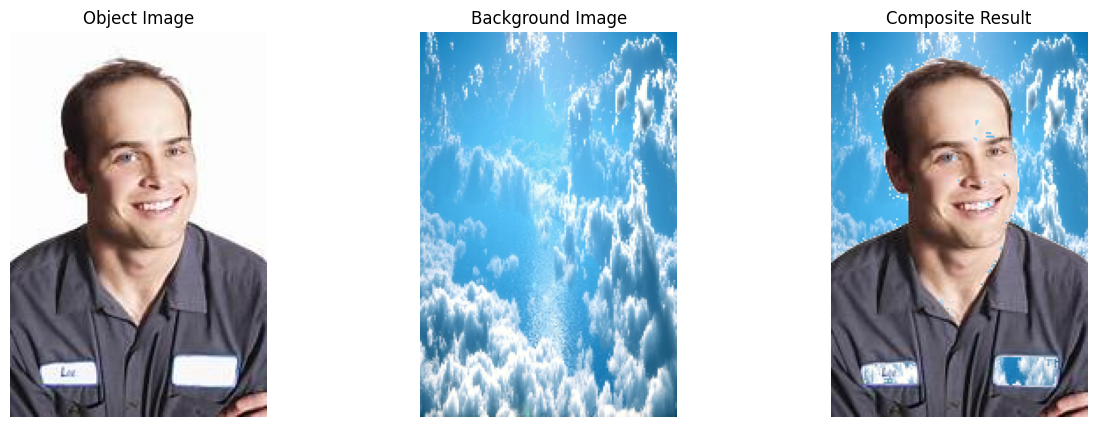

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_matting(object_image_path, background_image_path):
    # Read the object image
    object_image = cv2.imread(object_image_path)
    object_image = cv2.cvtColor(object_image, cv2.COLOR_BGR2RGB)
    
    # Read the background image
    background_image = cv2.imread(background_image_path)
    background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

    # Resize the background image to match the object image size
    background_image = cv2.resize(background_image, (object_image.shape[1], object_image.shape[0]))

    # Convert object image to grayscale
    gray = cv2.cvtColor(object_image, cv2.COLOR_RGB2GRAY)
    
    # Thresholding to get a binary mask
    ret, binary_mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
    
    # Invert binary mask
    binary_mask = cv2.bitwise_not(binary_mask)
    
    # Convert binary mask to alpha matte
    alpha_matte = binary_mask.astype(np.float32) / 255.0
    
    # Composite object image and background image using alpha matte
    result = np.zeros_like(object_image, dtype=np.uint8)
    for i in range(3):
        result[:,:,i] = alpha_matte * object_image[:,:,i] + (1 - alpha_matte) * background_image[:,:,i]
    
    return object_image, background_image, result

def plot_images(object_image, background_image, result_image):
    plt.figure(figsize=(15, 5))
    
    # Plot object image
    plt.subplot(1, 3, 1)
    plt.imshow(object_image)
    plt.title('Object Image')
    plt.axis('off')
    
    # Plot background image
    plt.subplot(1, 3, 2)
    plt.imshow(background_image)
    plt.title('Background Image')
    plt.axis('off')
    
    # Plot composite image
    plt.subplot(1, 3, 3)
    plt.imshow(result_image)
    plt.title('Composite Result')
    plt.axis('off')
    
    plt.show()

# Example usage
object_image_path = 'object.jpeg'  # Replace with your object image file path
background_image_path = 'background.jpg'  # Replace with your background image file path

object_image, background_image, result_image = image_matting(object_image_path, background_image_path)
plot_images(object_image, background_image, result_image)


In [ ]:
ModuleNotFoundError                       Traceback (most recent call last)
Cell In[8], line 2
      1 # Importing Required Modules 
----> 2 from rembg import remove 
      3 from PIL import Image 
      5 # Store path of the image in the variable input_path 

ModuleNotFoundError: No module named 'rembg'

In [22]:
import numpy as np
from PIL import Image
import pymatting

def main():
    # Load input image and trimap
    input_image_path = "object.jpeg"
    trimap_path = "background.jpg"
    
    input_image = np.array(Image.open(input_image_path)) / 255.0
    trimap = np.array(Image.open(trimap_path).convert("L")) / 255.0
    
    # Estimate alpha matte using KNN matting
    alpha = pymatting.knn_matting.knn_matting(input_image, trimap)
    
    # Extract foreground
    foreground = pymatting.foreground.KNNForeground(
        input_image, alpha[:, :, None]
    ).run()
    
    # Display or save the extracted foreground
    foreground_image = Image.fromarray((foreground * 255).astype(np.uint8))
    foreground_image.show()
    # foreground_image.save("foreground.png")  # Uncomment to save the foreground image

if __name__ == "__main__":
    main()

AttributeError: module 'pymatting' has no attribute 'knn_matting'